In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET

In [2]:
social=pd.read_csv("social.csv")
social

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# DATA ANALYSIS

In [3]:
social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
social.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
social.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [9]:
social.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
social.shape

(400, 5)

In [11]:
social.skew()

User ID           -0.034513
Age                0.231337
EstimatedSalary    0.495024
Purchased          0.596903
dtype: float64

# VISUALIZATION

In [12]:
social.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

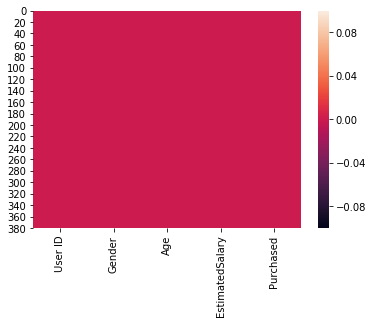

In [13]:
sns.heatmap(social.isnull())

In [14]:
social.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


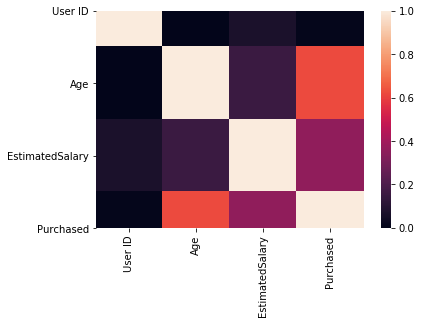

In [15]:
sns.heatmap(social.corr())

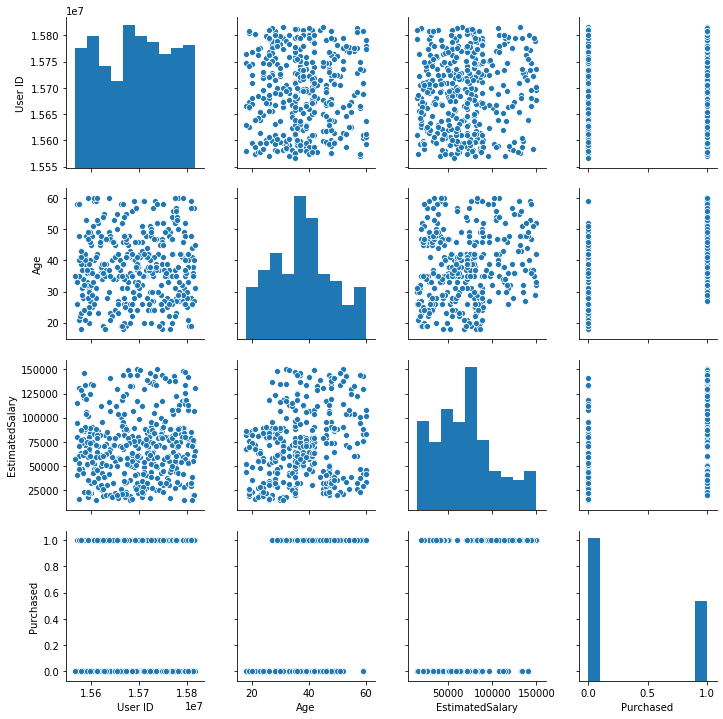

In [16]:
sns.pairplot(social)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000213715A2D88>,
      dtype=object)

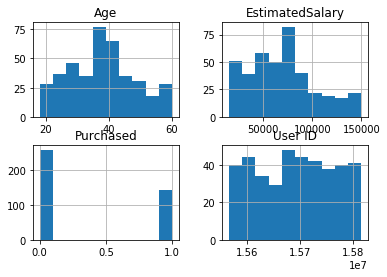

In [19]:
social.hist()

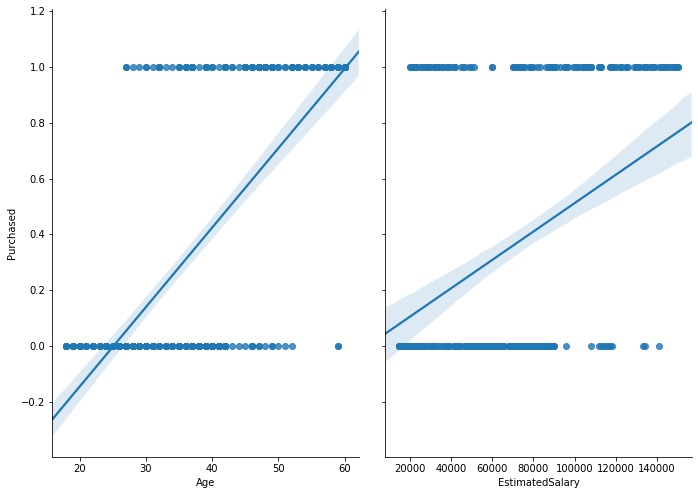

In [21]:
s=sns.pairplot(social,x_vars=["Age","EstimatedSalary"], y_vars="Purchased",kind="reg",size=7,aspect=0.7)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002137240CF08>,
      dtype=object)

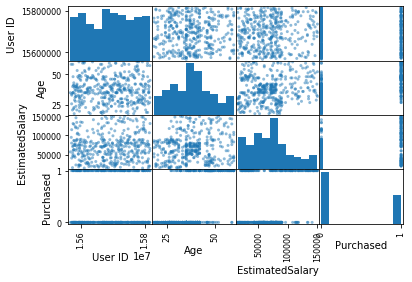

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(social)

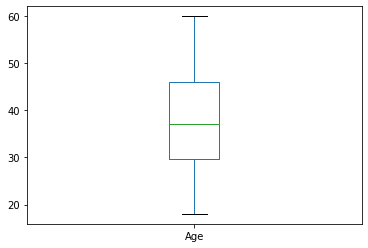

In [23]:
#Univariate plots or checking outliers
social['Age'].plot.box()

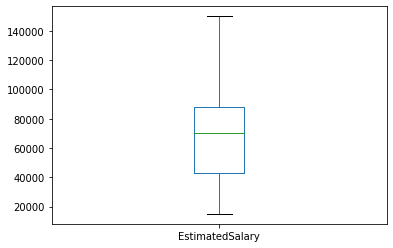

In [25]:
social['EstimatedSalary'].plot.box()

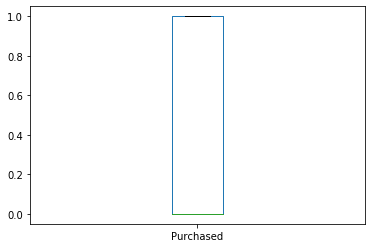

In [26]:
social['Purchased'].plot.box()

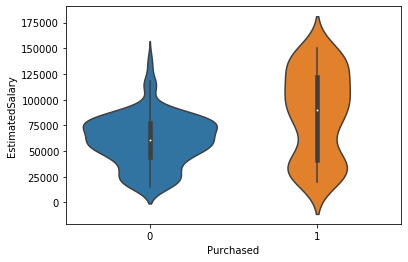

In [34]:
#Bivariate Plots
sns.violinplot(x='Purchased',y='EstimatedSalary',data=social)
plt.show()

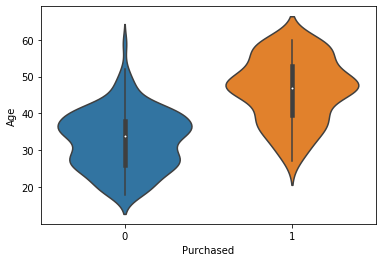

In [35]:
sns.violinplot(x='Purchased',y='Age',data=social)
plt.show()

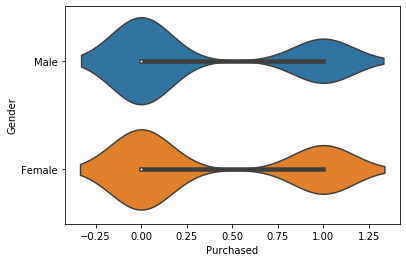

In [37]:
sns.violinplot(x='Purchased',y='Gender',data=social)
plt.show()

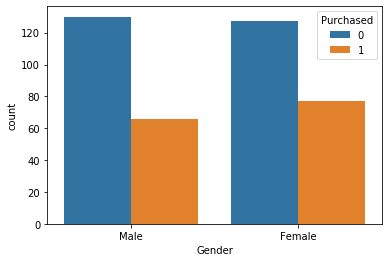

In [40]:
sns.countplot(x='Gender',hue='Purchased',data=social)
plt.show()

# DATA CLEANING

In [41]:
social.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [44]:
social=social.drop('User ID',axis=1)
social

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [47]:
social['Gender']=le.fit_transform(social['Gender'])

In [48]:
social

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [49]:
social.skew()

Gender             0.040159
Age                0.231337
EstimatedSalary    0.495024
Purchased          0.596903
dtype: float64

# SPLITTING DATA INTO X AND Y FOR TRAINING AND TESTING

In [50]:
x=social.drop('Purchased',axis=1)
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [51]:
y=social['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [55]:
#finding the best score at best random state value
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=10)

In [57]:
x_train.shape

(280, 3)

In [58]:
y_train.shape

(280,)

In [59]:
x_test.shape

(120, 3)

In [60]:
y_test.shape

(120,)

# Apply Model and Algorithms


In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [62]:
# Test Options and Evaluation Metrics
num_folds = 10
scoring='accuracy'
# Spot Check Algorithms
models = []
models.append(('lr', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('dtc', DecisionTreeClassifier()))
models.append(('rfc', RandomForestClassifier()))
models.append(('gbc', GradientBoostingClassifier()))
models.append(('svc',SVC()))
results = []
names = []
for name, model in models:
    kfold =KFold(n_splits=num_folds, random_state=45)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold,    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)

lr: 0.692857 (0.121848)
KNN: 0.814286 (0.054865)
dtc: 0.850000 (0.059333)
rfc: 0.860714 (0.062780)
gbc: 0.867857 (0.053093)
svc: 0.632143 (0.057698)


In [64]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
# Build parameter grid
params= {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150]}
# Build the model
model = GradientBoostingClassifier(n_estimators=100)
kfold = KFold(n_splits=num_folds, random_state=10)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.914286 using {'learning_rate': 0.02, 'max_depth': 4, 'min_samples_leaf': 20}
0.875000 (0.058139) with: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 20}
0.910714 (0.055902) with: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 50}
0.771429 (0.076931) with: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 100}
0.621429 (0.069985) with: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 150}
0.882143 (0.065951) with: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 20}
0.910714 (0.055902) with: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 50}
0.771429 (0.076931) with: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 100}
0.621429 (0.069985) with: {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 150}
0.875000 (0.066336) with: {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 20}
0.910714 (0.055902) with: {'learning_rate': 0.1, 'max_depth': 8, 'min_samples_leaf': 50}
0.771429 (0.076931) w

In [65]:
from sklearn.model_selection import cross_val_predict

In [66]:
gbc=GradientBoostingClassifier()
score=cross_val_score(gbc,x,y,cv=5,scoring='accuracy')

print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(gbc,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy Score= [0.79012346 0.92592593 0.8875     0.81012658 0.82278481]
Mean Scores 0.8472921550242225
Standard Deviation 0.05108833630693039
Y Prediction values
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 0
 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0
 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1]


0.8475

In [68]:
data1=pd.DataFrame({"Actual":y,"Predicted":y_pred})
data1

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
395,1,0
396,1,1
397,1,1
398,0,0


In [70]:
#Save the model
from sklearn.externals import joblib
joblib.dump(gbc,"social.pkl")

['social.pkl']